In [1]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millenials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millenials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [4]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_49997/1805281516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())


,Customer ID
Age Groups,
Gen Z,640
Millenials,1200
Gen X,1272
Baby Boomer,788


In [6]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millenials     1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [7]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [8]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_49997/1705233892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organized_df.groupby(["Age Groups"])["Gender"].value_counts()


Age Groups   Gender
Gen Z        Male      442
             Female    198
Millenials   Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [9]:
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
518,519,24,Gen Z,Male,Blouse,Clothing,100,Oregon,M,Beige,Fall,2.9,Yes,Next Day Air,Yes,Yes,16,Venmo,Every 3 Months
296,297,25,Gen Z,Male,Sandals,Footwear,74,Indiana,S,Lavender,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,19,Credit Card,Weekly
233,234,19,Gen Z,Male,Sweater,Clothing,83,Arizona,XL,Yellow,Fall,4.5,Yes,Next Day Air,Yes,Yes,27,Bank Transfer,Every 3 Months
2628,2629,25,Gen Z,Male,Hoodie,Clothing,51,Wyoming,M,Silver,Summer,3.8,No,Next Day Air,No,No,42,Credit Card,Bi-Weekly
1739,1740,21,Gen Z,Male,Jewelry,Accessories,98,Minnesota,L,Silver,Winter,4.2,No,Express,No,No,23,Cash,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,19,Gen Z,Male,Gloves,Accessories,49,New York,L,Peach,Winter,3.3,Yes,Next Day Air,Yes,Yes,2,Bank Transfer,Monthly
1230,1231,25,Gen Z,Male,Hat,Accessories,80,Illinois,L,Brown,Spring,4.6,No,Standard,Yes,Yes,49,Venmo,Monthly
801,802,25,Gen Z,Male,Belt,Accessories,29,New Mexico,L,Blue,Fall,4.9,Yes,Express,Yes,Yes,12,Credit Card,Fortnightly
397,398,22,Gen Z,Male,Belt,Accessories,46,Mississippi,M,Indigo,Fall,3.0,Yes,Free Shipping,Yes,Yes,26,Cash,Annually


In [10]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millenials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
112,113,37,Millenials,Male,Gloves,Accessories,65,Florida,M,Red,Spring,4.3,Yes,Free Shipping,Yes,Yes,28,PayPal,Bi-Weekly
2494,2495,42,Millenials,Male,Shoes,Footwear,27,Oklahoma,S,Peach,Winter,2.6,No,Store Pickup,No,No,26,Debit Card,Annually
1406,1407,32,Millenials,Male,Shirt,Clothing,46,Washington,L,Turquoise,Spring,3.6,No,Express,Yes,Yes,15,Debit Card,Monthly
1101,1102,30,Millenials,Male,Gloves,Accessories,76,Delaware,XL,Silver,Fall,3.0,No,Free Shipping,Yes,Yes,39,Cash,Fortnightly
2316,2317,28,Millenials,Male,Sneakers,Footwear,39,Montana,L,Yellow,Winter,3.8,No,Standard,No,No,7,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,392,37,Millenials,Male,Sweater,Clothing,86,Minnesota,L,Gray,Spring,4.8,Yes,Standard,Yes,Yes,25,Cash,Fortnightly
1340,1341,40,Millenials,Male,Belt,Accessories,72,Idaho,M,Peach,Fall,4.4,No,Next Day Air,Yes,Yes,5,Debit Card,Every 3 Months
825,826,27,Millenials,Male,Belt,Accessories,94,Nebraska,XL,Brown,Fall,3.6,Yes,Next Day Air,Yes,Yes,17,Cash,Monthly
805,806,41,Millenials,Male,Dress,Clothing,30,Connecticut,L,White,Summer,3.7,Yes,Next Day Air,Yes,Yes,40,Debit Card,Monthly


In [11]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
940,941,48,Gen X,Male,Belt,Accessories,44,Colorado,S,Maroon,Spring,2.6,Yes,Store Pickup,Yes,Yes,15,PayPal,Every 3 Months
1819,1820,51,Gen X,Male,Socks,Clothing,86,Nevada,S,Peach,Spring,4.5,No,Next Day Air,No,No,50,Cash,Quarterly
649,650,53,Gen X,Male,Pants,Clothing,93,Delaware,L,Orange,Spring,4.2,Yes,Store Pickup,Yes,Yes,33,PayPal,Every 3 Months
2303,2304,51,Gen X,Male,Sunglasses,Accessories,71,New Jersey,S,Beige,Spring,4.8,No,2-Day Shipping,No,No,31,Credit Card,Fortnightly
1909,1910,50,Gen X,Male,Sweater,Clothing,84,Kentucky,S,Black,Spring,4.3,No,Store Pickup,No,No,12,Credit Card,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2002,51,Gen X,Male,Sunglasses,Accessories,90,Wyoming,S,Purple,Winter,2.6,No,Free Shipping,No,No,2,Debit Card,Fortnightly
471,472,55,Gen X,Male,Scarf,Accessories,72,Missouri,XL,White,Winter,4.9,Yes,2-Day Shipping,Yes,Yes,36,Bank Transfer,Quarterly
882,883,50,Gen X,Male,Boots,Footwear,35,Virginia,M,Cyan,Fall,3.8,Yes,Next Day Air,Yes,Yes,37,Cash,Every 3 Months
1114,1115,55,Gen X,Male,Skirt,Clothing,25,New Hampshire,L,Violet,Fall,2.6,No,Next Day Air,Yes,Yes,47,Bank Transfer,Every 3 Months


In [12]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1966,1967,67,Baby Boomer,Male,Jacket,Outerwear,95,Indiana,XL,Purple,Winter,3.7,No,Express,No,No,5,Credit Card,Fortnightly
424,425,66,Baby Boomer,Male,Sweater,Clothing,23,Illinois,M,Gold,Winter,4.3,Yes,Standard,Yes,Yes,42,PayPal,Fortnightly
1248,1249,62,Baby Boomer,Male,Hat,Accessories,37,Wisconsin,XL,Red,Winter,3.0,No,Free Shipping,Yes,Yes,8,Credit Card,Annually
480,481,68,Baby Boomer,Male,Hoodie,Clothing,88,Vermont,M,Gray,Summer,4.8,Yes,Standard,Yes,Yes,30,Debit Card,Bi-Weekly
2086,2087,65,Baby Boomer,Male,Dress,Clothing,89,North Dakota,L,Beige,Summer,4.7,No,2-Day Shipping,No,No,36,Cash,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,2067,64,Baby Boomer,Male,Sneakers,Footwear,92,Illinois,M,Olive,Fall,4.7,No,Store Pickup,No,No,44,Debit Card,Fortnightly
49,50,68,Baby Boomer,Male,Hoodie,Clothing,30,New Jersey,S,Indigo,Spring,4.6,Yes,Next Day Air,Yes,Yes,34,Debit Card,Bi-Weekly
1424,1425,66,Baby Boomer,Male,Jacket,Outerwear,23,Connecticut,S,Indigo,Fall,3.5,No,Standard,Yes,Yes,34,Bank Transfer,Every 3 Months
2297,2298,60,Baby Boomer,Male,Socks,Clothing,83,California,M,Orange,Summer,4.7,No,Standard,No,No,1,Bank Transfer,Quarterly


In [13]:
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3072,3073,26,Gen Z,Female,Jewelry,Accessories,98,New York,L,Peach,Spring,3.1,No,Standard,No,No,46,PayPal,Quarterly
3776,3777,19,Gen Z,Female,Sneakers,Footwear,25,Alaska,L,Olive,Spring,4.1,No,Standard,No,No,10,Credit Card,Fortnightly
3063,3064,26,Gen Z,Female,Sunglasses,Accessories,43,Connecticut,L,Brown,Winter,3.9,No,Store Pickup,No,No,24,Credit Card,Fortnightly
3491,3492,22,Gen Z,Female,Pants,Clothing,28,Maine,M,Orange,Winter,4.3,No,Express,No,No,15,Cash,Monthly
3771,3772,21,Gen Z,Female,T-shirt,Clothing,86,Oklahoma,M,Red,Winter,2.6,No,Express,No,No,28,Venmo,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,2655,23,Gen Z,Female,Coat,Outerwear,70,Idaho,S,Pink,Fall,4.1,No,Next Day Air,No,No,4,PayPal,Annually
3014,3015,24,Gen Z,Female,T-shirt,Clothing,65,Utah,M,Maroon,Spring,4.5,No,Express,No,No,38,PayPal,Every 3 Months
3800,3801,19,Gen Z,Female,Sweater,Clothing,26,Vermont,M,Turquoise,Fall,4.8,No,Next Day Air,No,No,12,Venmo,Bi-Weekly
2973,2974,25,Gen Z,Female,Boots,Footwear,65,Indiana,M,Blue,Summer,2.7,No,Store Pickup,No,No,3,Bank Transfer,Fortnightly


In [14]:
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millenials")&(organized_df["Gender"]=="Female")].sample(n=198)
Mill_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3262,3263,42,Millenials,Female,T-shirt,Clothing,35,Indiana,M,Violet,Spring,2.7,No,Standard,No,No,21,Cash,Every 3 Months
3857,3858,42,Millenials,Female,Hat,Accessories,21,Texas,S,Yellow,Summer,3.1,No,Store Pickup,No,No,29,Credit Card,Every 3 Months
3366,3367,38,Millenials,Female,Gloves,Accessories,65,North Carolina,M,Red,Spring,3.6,No,2-Day Shipping,No,No,47,Debit Card,Quarterly
3453,3454,31,Millenials,Female,Shirt,Clothing,60,Alabama,L,Pink,Winter,4.3,No,Standard,No,No,48,Venmo,Bi-Weekly
3787,3788,37,Millenials,Female,Blouse,Clothing,80,New York,M,Pink,Fall,3.6,No,2-Day Shipping,No,No,46,PayPal,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,3306,34,Millenials,Female,Hoodie,Clothing,41,Nebraska,L,Cyan,Summer,4.9,No,Standard,No,No,31,PayPal,Bi-Weekly
3460,3461,41,Millenials,Female,Scarf,Accessories,78,Indiana,M,Gold,Spring,3.1,No,Express,No,No,5,Bank Transfer,Bi-Weekly
3727,3728,41,Millenials,Female,Socks,Clothing,83,Maine,M,Gold,Summer,3.5,No,Next Day Air,No,No,17,Debit Card,Bi-Weekly
3271,3272,35,Millenials,Female,Socks,Clothing,55,Nevada,XL,Magenta,Spring,4.4,No,Standard,No,No,30,Credit Card,Weekly


In [15]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3768,3769,50,Gen X,Female,Sweater,Clothing,35,Vermont,M,Yellow,Winter,4.0,No,Free Shipping,No,No,34,Bank Transfer,Quarterly
3333,3334,55,Gen X,Female,Jeans,Clothing,35,Minnesota,M,Violet,Spring,4.2,No,Express,No,No,3,PayPal,Monthly
3619,3620,44,Gen X,Female,Scarf,Accessories,75,North Carolina,S,Magenta,Winter,4.9,No,2-Day Shipping,No,No,50,Venmo,Weekly
3318,3319,45,Gen X,Female,Jacket,Outerwear,46,North Dakota,M,Olive,Summer,3.9,No,Free Shipping,No,No,15,PayPal,Monthly
3477,3478,53,Gen X,Female,Handbag,Accessories,85,Kentucky,S,Teal,Spring,3.8,No,Store Pickup,No,No,38,Debit Card,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,3090,50,Gen X,Female,Sandals,Footwear,21,North Carolina,L,Blue,Fall,4.6,No,Free Shipping,No,No,23,Cash,Bi-Weekly
3361,3362,47,Gen X,Female,Shoes,Footwear,26,Florida,M,Silver,Spring,4.1,No,Free Shipping,No,No,47,Credit Card,Bi-Weekly
2952,2953,50,Gen X,Female,Belt,Accessories,24,Alabama,M,Peach,Spring,4.9,No,Next Day Air,No,No,5,Debit Card,Monthly
3172,3173,57,Gen X,Female,Socks,Clothing,52,Missouri,M,Olive,Fall,3.7,No,Standard,No,No,30,Debit Card,Bi-Weekly


In [16]:
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3223,3224,68,Baby Boomer,Female,Shirt,Clothing,65,Montana,S,Gray,Spring,3.9,No,Standard,No,No,36,Venmo,Bi-Weekly
2801,2802,64,Baby Boomer,Female,Shirt,Clothing,56,New Mexico,M,Indigo,Winter,2.6,No,Express,No,No,30,PayPal,Annually
2800,2801,70,Baby Boomer,Female,Shirt,Clothing,76,Arkansas,L,Violet,Fall,3.4,No,Free Shipping,No,No,14,Cash,Bi-Weekly
2861,2862,66,Baby Boomer,Female,Coat,Outerwear,54,Maryland,M,Teal,Fall,3.4,No,Free Shipping,No,No,27,Credit Card,Monthly
3118,3119,61,Baby Boomer,Female,Shorts,Clothing,97,Virginia,L,Blue,Summer,4.7,No,Standard,No,No,31,Debit Card,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,3842,68,Baby Boomer,Female,Jeans,Clothing,57,Mississippi,L,Pink,Fall,4.2,No,2-Day Shipping,No,No,8,Bank Transfer,Monthly
3297,3298,67,Baby Boomer,Female,Belt,Accessories,82,West Virginia,M,Violet,Fall,4.1,No,Free Shipping,No,No,47,PayPal,Monthly
3818,3819,70,Baby Boomer,Female,Sneakers,Footwear,41,Oregon,XL,Indigo,Winter,3.8,No,Free Shipping,No,No,42,Cash,Monthly
2778,2779,70,Baby Boomer,Female,Belt,Accessories,57,Pennsylvania,L,Yellow,Spring,3.2,No,Standard,No,No,24,Credit Card,Bi-Weekly


In [17]:
GenZ_male["Review Rating"]

518     2.9
296     4.8
233     4.5
2628    3.8
1739    4.2
       ... 
512     3.3
1230    4.6
801     4.9
397     3.0
2220    4.5
Name: Review Rating, Length: 198, dtype: float64

In [18]:
Mill_male["Review Rating"]

112     4.3
2494    2.6
1406    3.6
1101    3.0
2316    3.8
       ... 
391     4.8
1340    4.4
825     3.6
805     3.7
996     4.9
Name: Review Rating, Length: 198, dtype: float64

In [19]:
GenX_male["Review Rating"]

940     2.6
1819    4.5
649     4.2
2303    4.8
1909    4.3
       ... 
2001    2.6
471     4.9
882     3.8
1114    2.6
47      4.5
Name: Review Rating, Length: 198, dtype: float64

In [20]:
Baby_male["Review Rating"]

1966    3.7
424     4.3
1248    3.0
480     4.8
2086    4.7
       ... 
2066    4.7
49      4.6
1424    3.5
2297    4.7
675     2.6
Name: Review Rating, Length: 198, dtype: float64

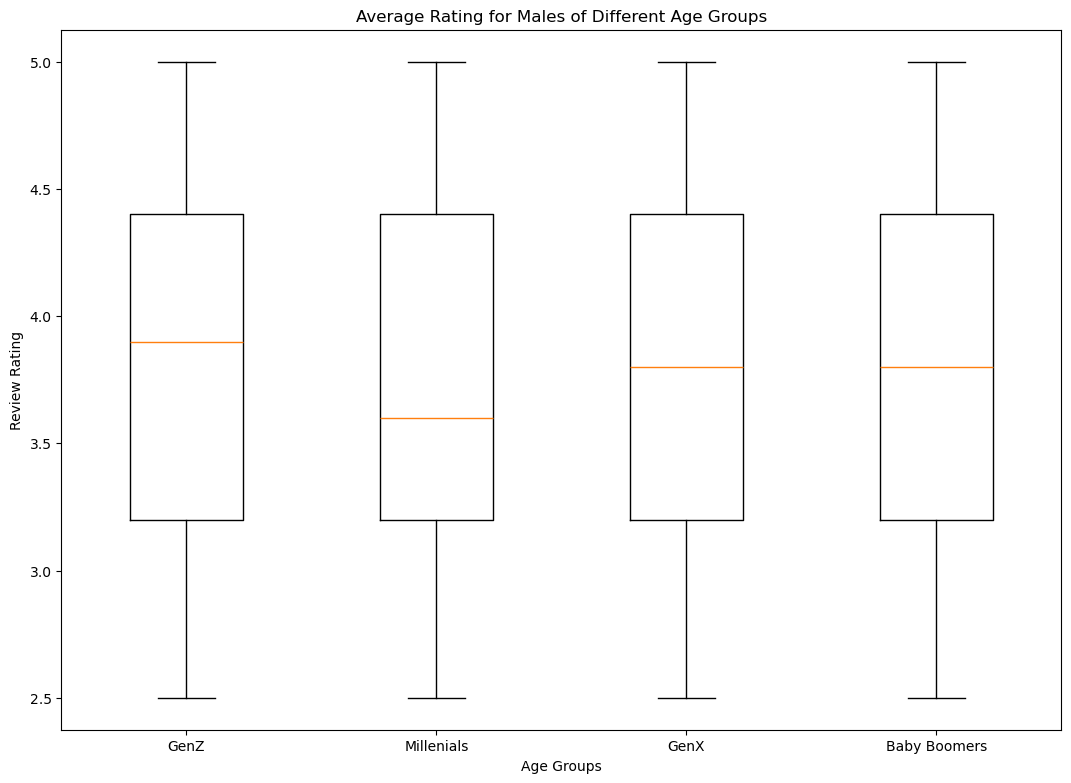

In [21]:
# Box and Whisker plot for Males of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_male["Review Rating"]
data_2 = Mill_male["Review Rating"]
data_3 = GenX_male["Review Rating"]
data_4 = Baby_male["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Males of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millenials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

In [22]:
GenZ_female["Review Rating"]

3072    3.1
3776    4.1
3063    3.9
3491    4.3
3771    2.6
       ... 
2654    4.1
3014    4.5
3800    4.8
2973    2.7
2715    4.1
Name: Review Rating, Length: 198, dtype: float64

In [23]:
Mill_female["Review Rating"]

3262    2.7
3857    3.1
3366    3.6
3453    4.3
3787    3.6
       ... 
3305    4.9
3460    3.1
3727    3.5
3271    4.4
2746    3.7
Name: Review Rating, Length: 198, dtype: float64

In [24]:
GenX_female["Review Rating"]

3768    4.0
3333    4.2
3619    4.9
3318    3.9
3477    3.8
       ... 
3089    4.6
3361    4.1
2952    4.9
3172    3.7
2752    4.0
Name: Review Rating, Length: 198, dtype: float64

In [25]:
Baby_female["Review Rating"]

3223    3.9
2801    2.6
2800    3.4
2861    3.4
3118    4.7
       ... 
3841    4.2
3297    4.1
3818    3.8
2778    3.2
3836    2.5
Name: Review Rating, Length: 198, dtype: float64

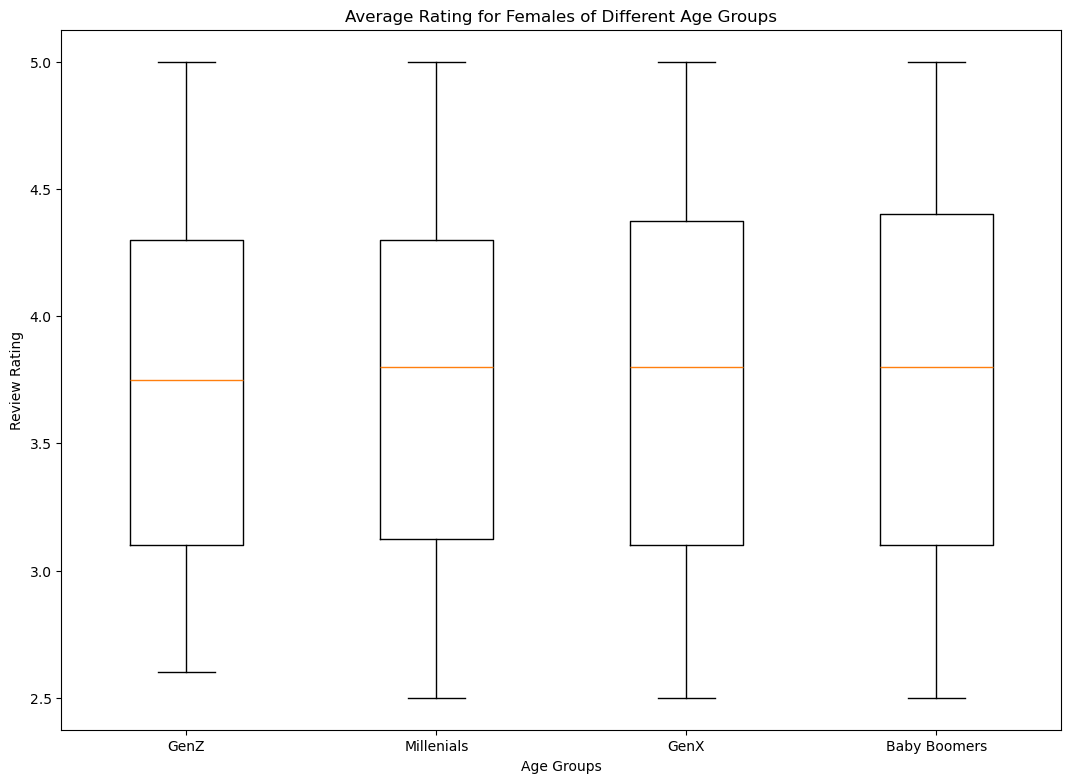

In [26]:
# Box and Whisker plot for Females of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_female["Review Rating"]
data_2 = Mill_female["Review Rating"]
data_3 = GenX_female["Review Rating"]
data_4 = Baby_female["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Females of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millenials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

In [27]:
## What type of clothing is purchased for each season work below this line ##

In [28]:
organized_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [29]:
organized_df.groupby(["Category"])["Season"].value_counts()

Category     Season
Accessories  Fall      324
             Summer    312
             Winter    303
             Spring    301
Clothing     Spring    454
             Winter    448
             Fall      427
             Summer    408
Footwear     Spring    163
             Summer    160
             Winter    140
             Fall      136
Outerwear    Fall       88
             Spring     81
             Winter     80
             Summer     75
Name: count, dtype: int64

In [48]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Millenials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually
3882,3883,35,Millenials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3883,3884,34,Millenials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly


In [53]:
# Filter the DataFrame down only to those columns to chart
season_category = fall_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
season_category_counts = season_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
season_category_counts = season_category_counts.unstack()

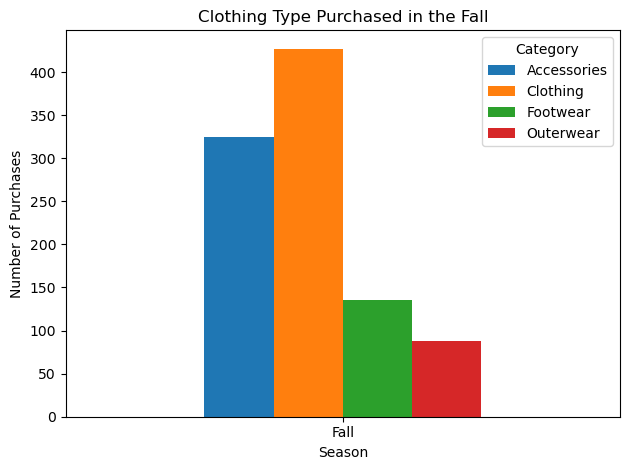

In [54]:
# Plot the data
season_category_counts.plot(kind="bar", stacked=False)
plt.title("Clothing Type Purchased in the Fall")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title="Category")  # Add legend with title
plt.tight_layout()
plt.show()

In [52]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millenials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millenials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millenials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millenials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [57]:
# Filter the DataFrame down only to those columns to chart
season_category = winter_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
season_category_counts = season_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
season_category_counts = season_category_counts.unstack()

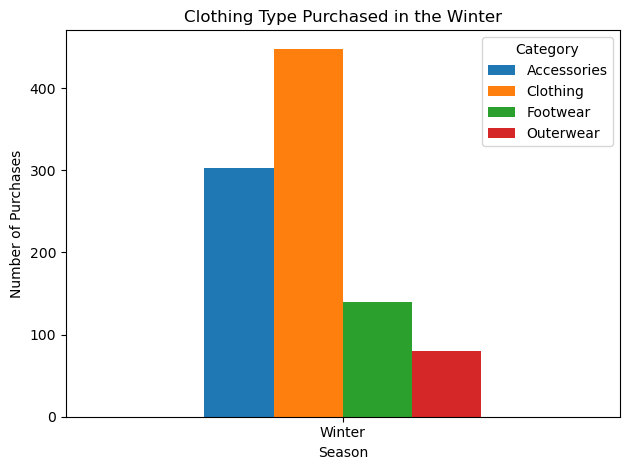

In [58]:
# Plot the data
season_category_counts.plot(kind="bar", stacked=False)
plt.title("Clothing Type Purchased in the Winter")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title="Category")  # Add legend with title
plt.tight_layout()
plt.show()

In [59]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [60]:
# Filter the DataFrame down only to those columns to chart
season_category = spring_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
season_category_counts = season_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
season_category_counts = season_category_counts.unstack()

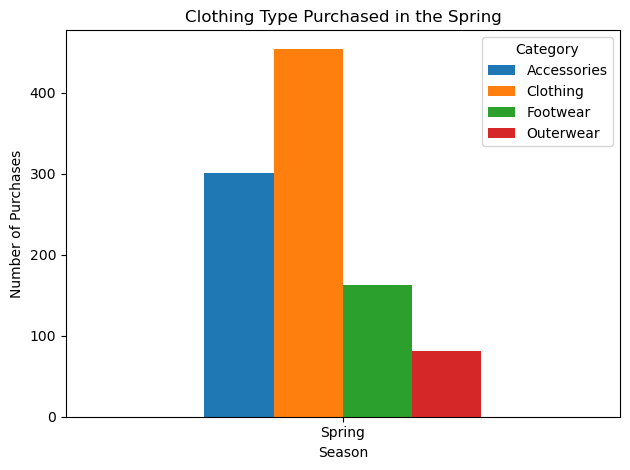

In [61]:
# Plot the data
season_category_counts.plot(kind="bar", stacked=False)
plt.title("Clothing Type Purchased in the Spring")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title="Category")  # Add legend with title
plt.tight_layout()
plt.show()

In [62]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millenials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millenials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millenials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [63]:
# Filter the DataFrame down only to those columns to chart
season_category = summer_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
season_category_counts = season_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
season_category_counts = season_category_counts.unstack()

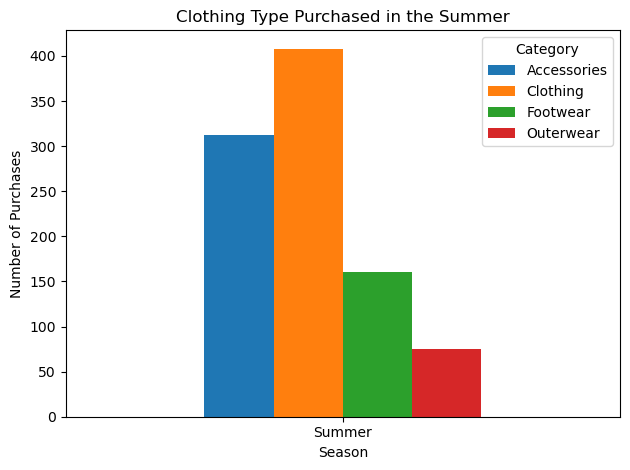

In [64]:
# Plot the data
season_category_counts.plot(kind="bar", stacked=False)
plt.title("Clothing Type Purchased in the Summer")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title="Category")  # Add legend with title
plt.tight_layout()
plt.show()